<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- AirQuality 데이터에 대해 모델링합니다.
- KNN 알고리즘을 사용해 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
# 기술통계 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [5]:
# NaN 값 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.
- 시계열 데이터이므로 선형보간법으로 채웁니다.

In [7]:
# 결측치 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [8]:
# 결측치 채우기
data.interpolate(method='linear', inplace=True) # 선형보간법으로 제거

# 확인
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.
- Month, Day 열을 제거합니다.

In [9]:
#  변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56


**3) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [10]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [11]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  

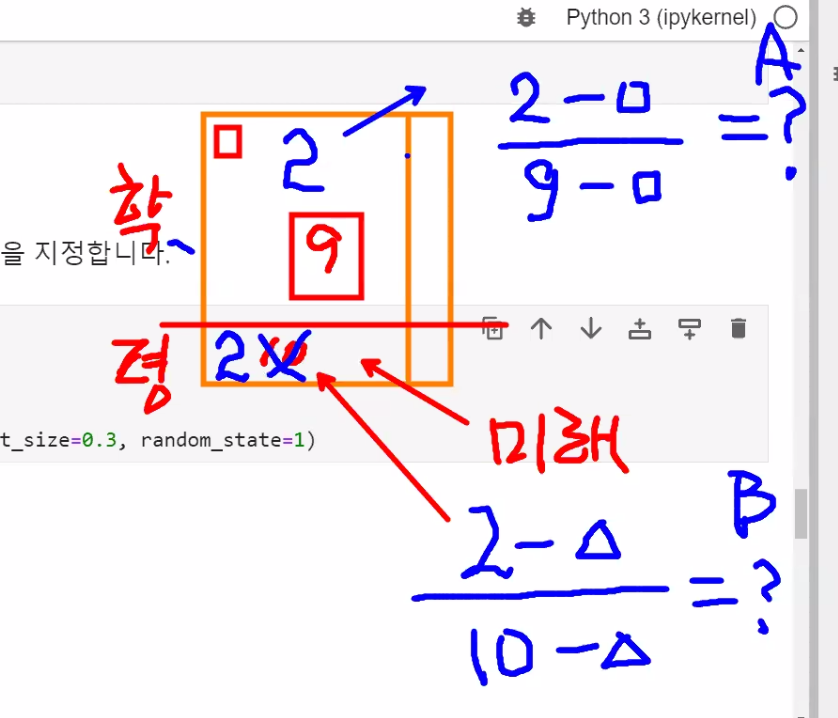

- 우리의 기대 > 학습데이터에서 만났던 데이터가 평가에서 데이터에서 나오는 것
- 미래의 데이터를 현재 데이터에 영향을 주면 안 됨. 우리에겐 미래의 데이터가 없고, 본 적이 없다. 얘는 마지막에 평가받고 끝나는 것임
- 정규화할때 최솟값, 최댓값 전부 학습데이터로 하고, 평가데이터에도 학습데이터를 기반으로 해야 한다 
- 이 사실을 기반으로 해야 한다. 꼭 트레인데이터를 기반으로 기준을 세워라!

**4) 정규화**

- KNN 알고리즘을 사용하기 위해 정규화를 진행합니다.
- 다음 중 한 가지 방법을 사용해 진행합니다.

- 방법1: 공식 사용
$$ \huge x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}} $$

In [12]:
# 최댓값, 최솟값 구하기
x_max = x_train.max()
x_min = x_train.min()


# 정규화
x_train = (x_train - x_min) / (x_max - x_min)
x_test = (x_test - x_min) / (x_max - x_min) # 기준이 train data인 걸 꼭 기억해달라..

# 이거의 좋은 점은 x_train, x_test가 여전히 df로 남아있는 것
# 하지만 함수 사용 방법은 다시 df로 바꿔줘야하는 불편함이 생김

- 방법2: 함수 사용

In [13]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화 --> np.array
scaler = MinMaxScaler()
scaler.fit(x_train) # 야 이데이터 좀 잘 확인해봐. 최댓값과 최솟값 찾아 봐 구해!!
x_train = scaler.transform(x_train) # 정규화해 > 최댓값 최소값 구한 거 있지? 그걸로 엑스트레인을 스케일링해서 집어넣구 
x_test = scaler.transform(x_test) # 정규화해 > 좀전에 학습데이터가지고 정규화했던거 있찌? 응! 그걸로 해

# 컬럼 이름 확보
x_col = list(x) # x에서 컬럼을 빼서 갖고 있구 / 이렇게 하면 배열로 나옴... df로 변환이 필요함
# df 만들기(이후에 필요할까봐... np array가 어색한 이유 > 값만 있어서 ㅇㅇ 근데 머신들은 좋아함 머신은 칼럼을 알 필요가 없어서)
x_train = pd.DataFrame(x_train, columns=x_col)
x_test = pd.DataFrame(x_test, columns=x_col)

# 확인
x_train.head() # 여기서 나온 값은 정규화가 된 거니까 인간이 느낄 수 없는 데이터임. 기온, 풍속 0.4 느껴져요? 안느껴지죠.
# 학습데이터에서 알고 있는 최솟값, 최댓값으로 평가데이터를 정규화하자 >> 의미론적으로 이게 맞는 거임



,Solar.R,Wind,Temp
0,0.770642,0.421053,0.447368
1,0.513761,0.694737,0.657895
2,0.963303,0.515789,0.315789
3,0.091743,0.394737,0.236842
4,0.921509,0.663158,0.000000


# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [14]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsRegressor # 에어퀄리티 데이턴는 회귀 문제를 풀고 있기 때문에 Regressor임 보통 KNN은 분류라고 생각하는데 조심해
from sklearn.metrics import mean_absolute_error, r2_score # 회귀문제를 풀면서 분류문제의 평가지표를 불러오지 말자.


In [16]:
# 2단계: 선언하기
model = KNeighborsRegressor(n_neighbors=5) # n_neighbors를 K라고 함 근데 왜 5를줬어? 의미있는 K값을 찾아서 줘야하는데 튜닝의 영역이니 우선은 5를 주자 5가 디폴트이니까

In [17]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsRegressor()

In [18]:
# 4단계 예측하기
y_pred = model.predict(x_test)

In [19]:
# 5단계: 평가하기

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 12.443478260869565
R2: 0.6168024614834005


- k값이 엔 네이보즈인데 튜닝해서 찾아야 함
- 정규화 작업이 필요하다.

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

- KNN은 따로 시각화를 하는 그런 게 없다 정점은 디션트리에서 마주함

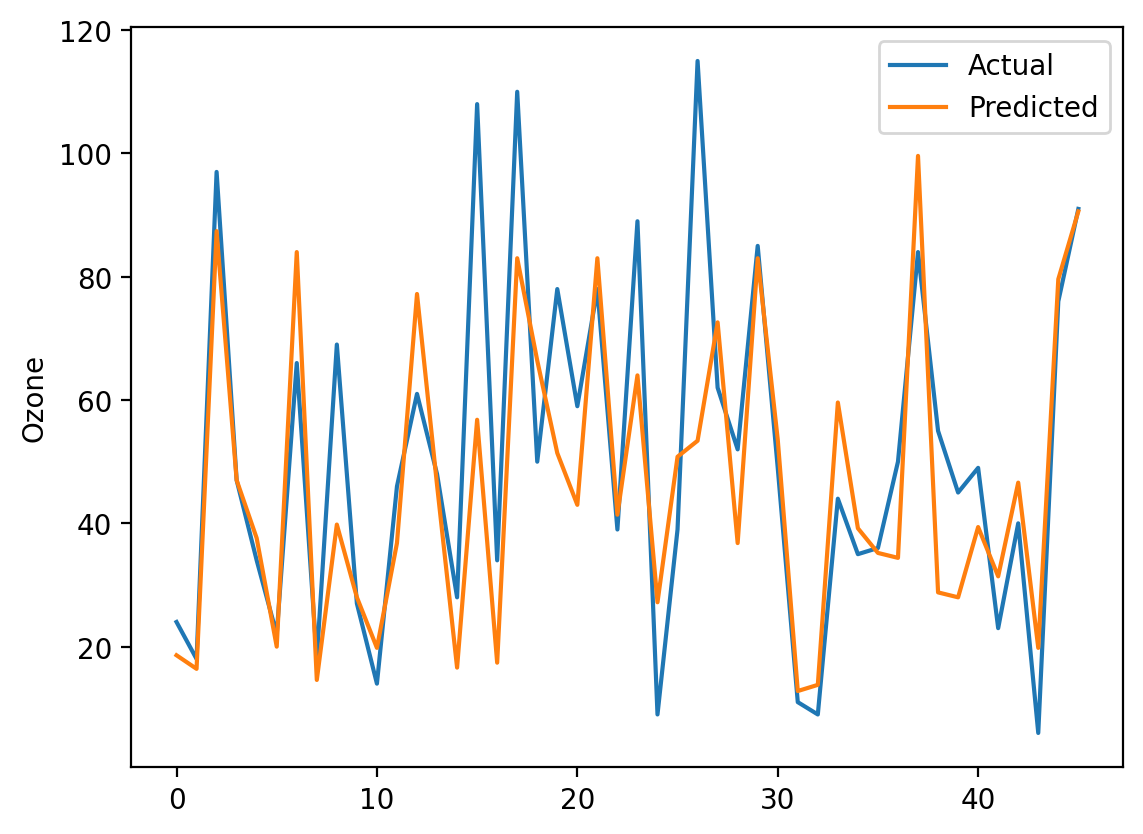

In [20]:
# 예측값, 실젯값 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Ozone')
plt.show()